## Hydrogens experiment

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re

In [41]:
def smooth_loss(losses, window_size=5):
    """
    Smooth the loss values using a moving average
    Params:
        losses: np array of loss values
        window_size: int, size of the moving average window
    Returns:
        np array of smoothed loss values
    """
    return np.convolve(losses, np.ones(window_size)/window_size, mode='valid')

81 files found


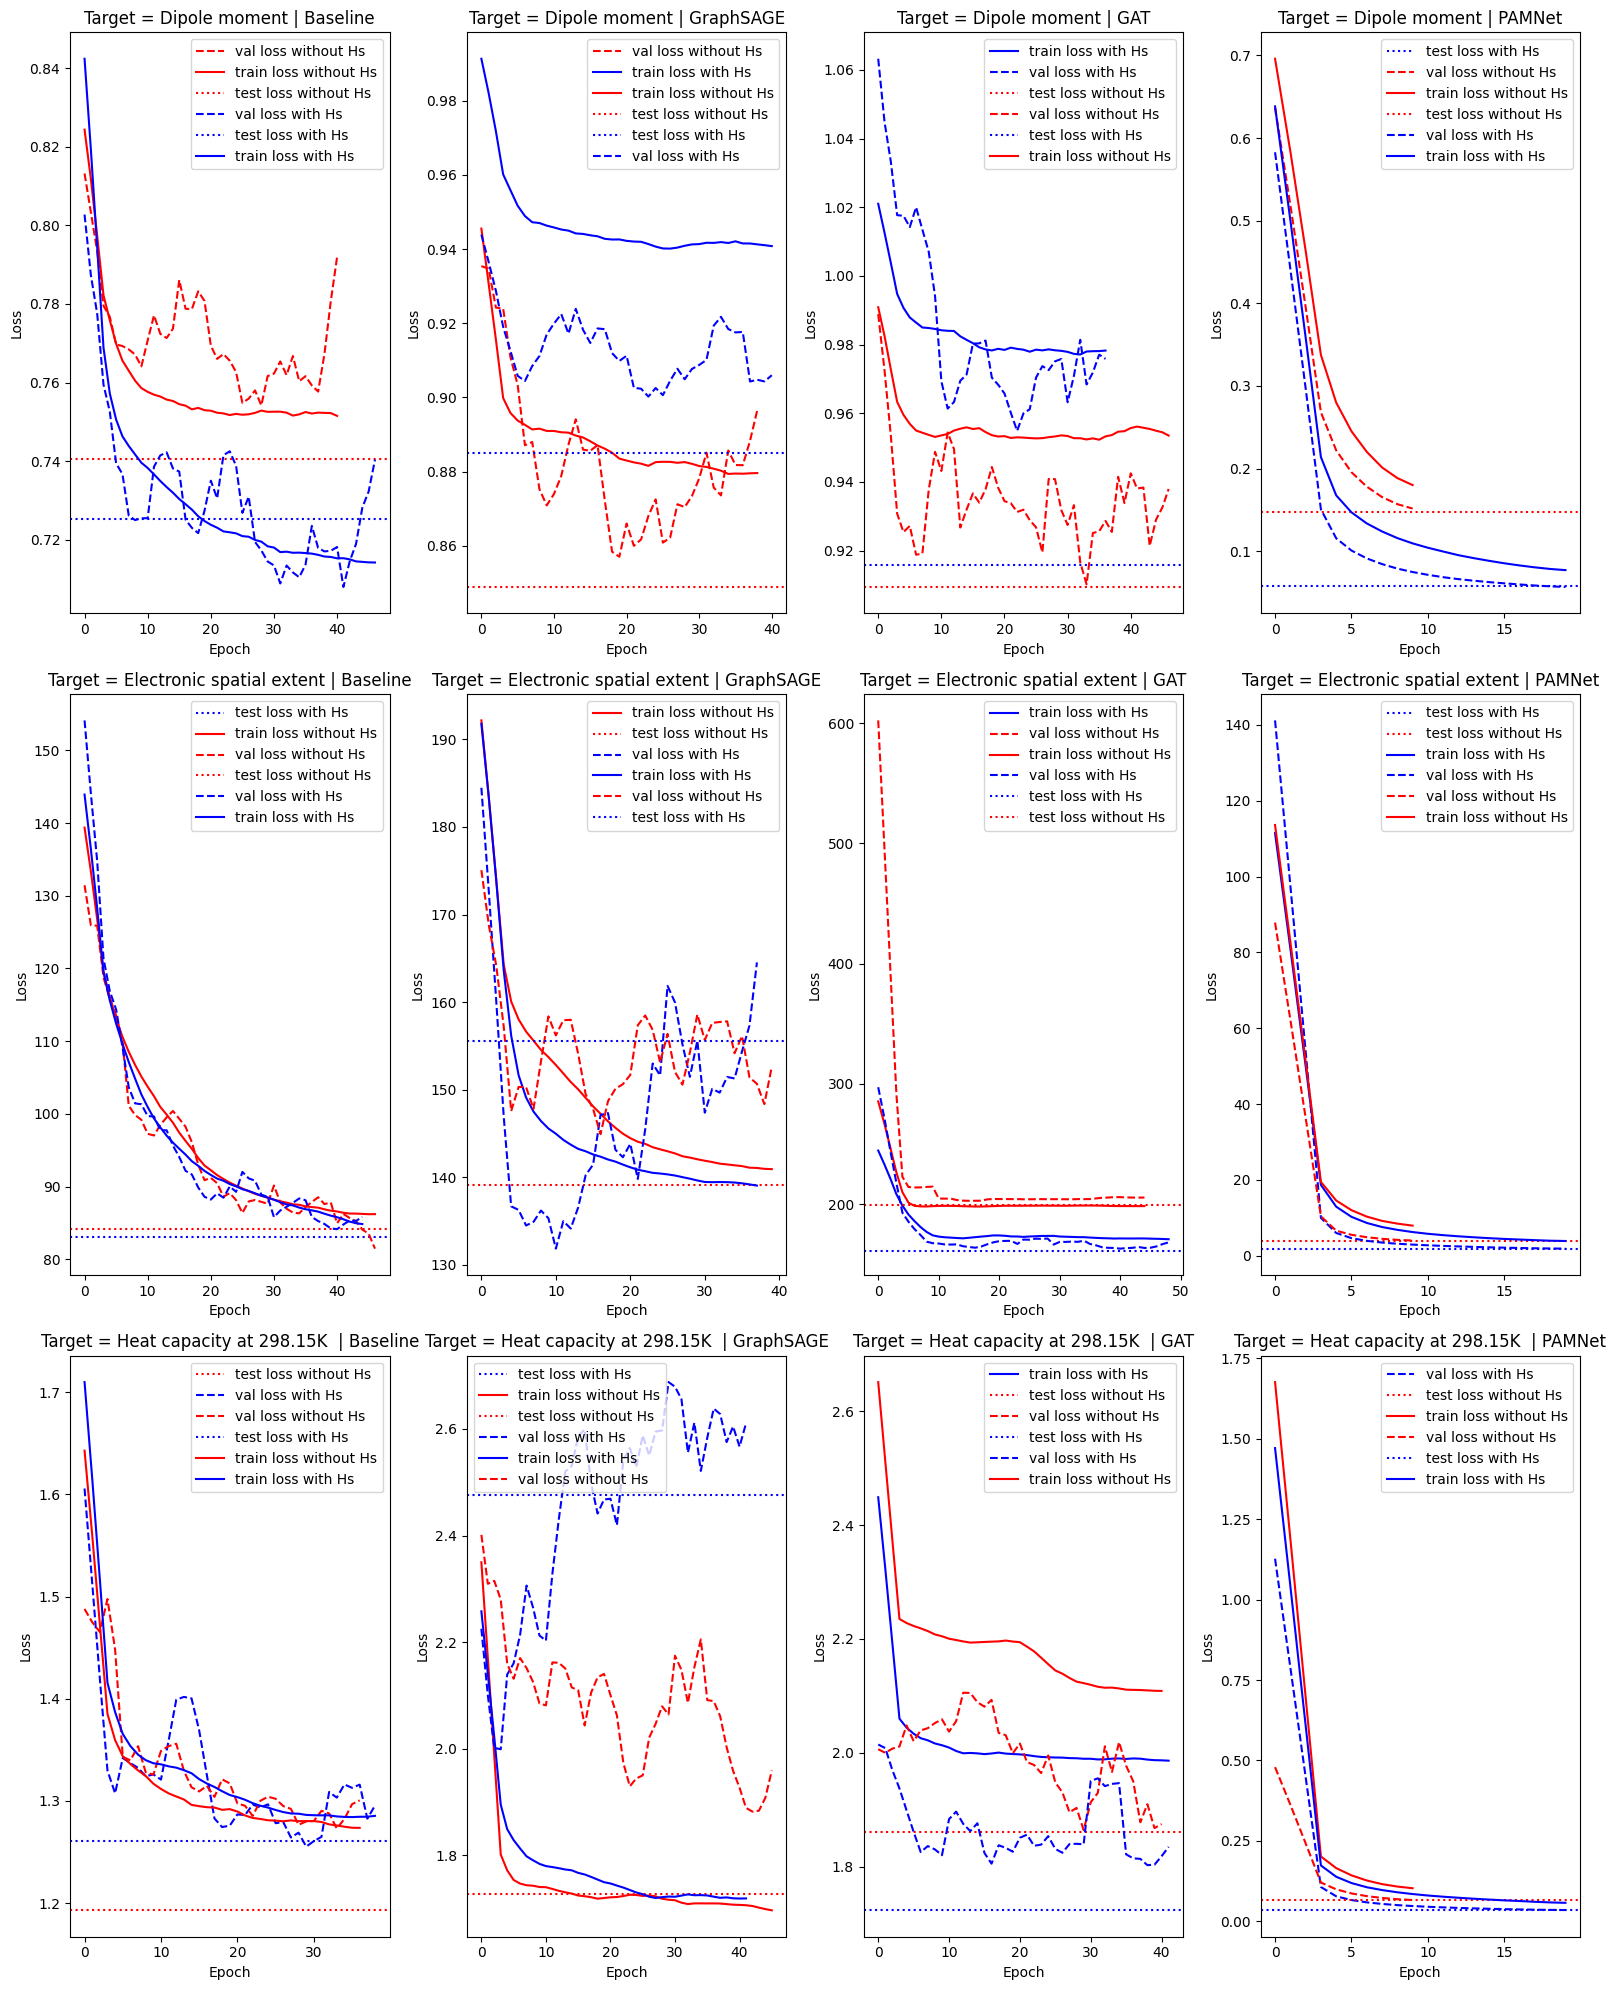

In [42]:
models = ['Baseline', 'GraphSAGE', 'GAT', 'PAMNet']

# all npy files in the predictions folder
files = [f for f in os.listdir('./predictions') if f.endswith('.npy') and 'hydrogens' in f and 'extrafeature' not in f]
print(len(files), "files found")
# Sort files by target number
files.sort(key=lambda f: int(re.search(r'target_(\d+)', f).group(1)))

# Initialize plot
fig, axs = plt.subplots(3, len(models), figsize=(16, 20))

target_mapping = {0:0, 5:1, 11:2}
target_to_name = {0:'Dipole moment', 5:'Electronic spatial extent', 11:'Heat capacity at 298.15K '}
model_mapping = dict(zip(models, range(len(models))))

for i, file in enumerate(files):

    # Extract information from file name
    model_name = re.search(r'(Baseline|GraphSAGE|GAT|PAMNet)', file)
    if model_name is None:
        continue
    model_name = model_name.group(1)
    target = int(re.search(r'target_(\d+)', file).group(1))
    hydrogen = re.search(r'hydrogens_(True|False)', file).group(1) == 'True'
    loss_type = re.search(r'(train|val|test)_loss', file).group(1)

    # Load loss history
    losses = np.load(os.path.join("./predictions", file))
    if loss_type in ['train', 'val']:
        window_size = 5
        losses = np.pad(losses, (window_size//2, window_size-1-window_size//2), mode='edge')
        losses = smooth_loss(losses, window_size=window_size)
        # losses = np.pad(losses, (window_size//2, window_size-1-window_size//2), mode='edge')


    # Plot loss history
    color = 'blue' if int(hydrogen) else 'red'
    linestyle = '-' if loss_type == 'train' else '--' if loss_type == 'val' else ':'
    label = f'{loss_type} loss with Hs' if bool(hydrogen) else f'{loss_type} loss without Hs'
    if loss_type in ['train', 'val']:
        axs[target_mapping[target], model_mapping[model_name]].plot(losses, color=color, linestyle=linestyle, label=label)
    else:
        axs[target_mapping[target], model_mapping[model_name]].axhline(y=losses, color=color, linestyle=linestyle, label=label)
    axs[target_mapping[target], model_mapping[model_name]].set_title(f'Target = {target_to_name[target]} | {model_name}')

# Set plot properties
for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Loss')
    ax.legend()

# Display plot
plt.tight_layout()
plt.savefig('figures/hydrogens.png')
plt.show()

## Extra atomic features experiment

81 files found


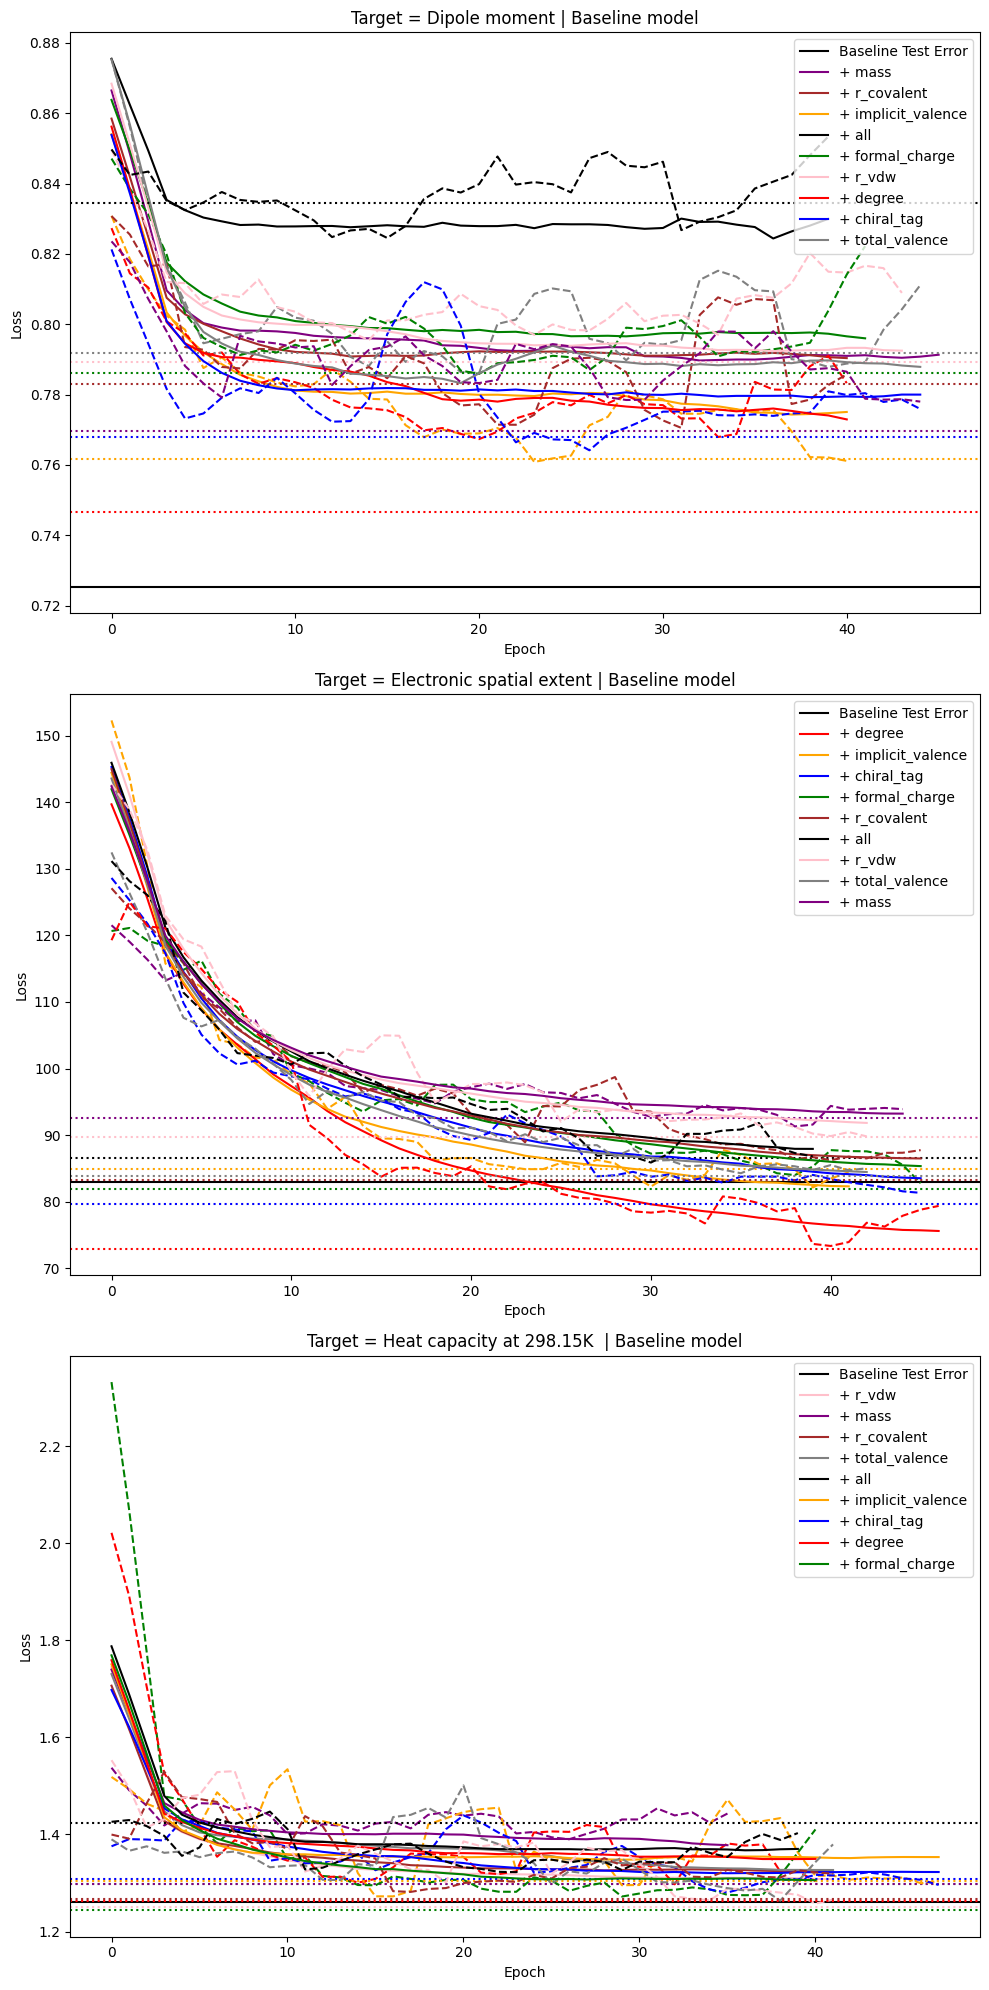

In [44]:
# sort all npy files in the predictions folder
files = [f for f in os.listdir('./predictions') if f.endswith('.npy') and 'extrafeature' in f and 'hydrogen' not in f]
print(len(files), "files found")
files.sort(key=lambda f: int(re.search(r'target_(\d+)', f).group(1)))

fig, axs = plt.subplots(3, 1, figsize=(10, 20))
extra_feature_colors_dict = {'chiral_tag':'blue', 'degree':'red', 'formal_charge':'green', 'implicit_valence':'orange', 'mass':'purple', 'r_covalent':'brown', 'r_vdw':'pink', 'total_valence':'gray', 'all':'black'}
target_mapping = {0:0, 5:1, 11:2}
target_to_name = {0:'Dipole moment', 5:'Electronic spatial extent', 11:'Heat capacity at 298.15K '}

baseline_files = [f'Baseline_target_{target}_hydrogens_True_test_loss.npy' for target in target_mapping.keys()]
for i, file in enumerate(baseline_files):
    test_loss = np.load(os.path.join("./predictions", file))
    axs[i].axhline(y=test_loss, color='black', linestyle='solid', label='Baseline Test Error')

for i, file in enumerate(files):

    target = int(re.search(r'target_(\d+)', file).group(1))
    extrafeature = re.search(r'extrafeature_(chiral_tag|degree|formal_charge|implicit_valence|mass|r_covalent|r_vdw|total_valence|all)', file).group(1)
    loss_type = re.search(r'(train|val|test)_loss', file).group(1)

    # Load loss history
    losses = np.load(os.path.join("./predictions", file))

    if extrafeature == 'mass' and loss_type == 'val' and target == 0:
        losses = losses[:-1]

    # Plot loss history
    color = extra_feature_colors_dict[extrafeature]
    linestyle = '-' if loss_type == 'train' else '--' if loss_type == 'val' else ':'
    label = f'+ {extrafeature}' if loss_type == 'train' else None
    if loss_type in ['train', 'val']:
        window_size = 5
        losses = np.pad(losses, (window_size//2, window_size-1-window_size//2), mode='edge')
        losses = smooth_loss(losses, window_size=5)
        axs[target_mapping[target]].plot(losses, color=color, linestyle=linestyle, label=label)
    else:
        axs[target_mapping[target]].axhline(y=losses, color=color, linestyle=linestyle, label=label)
    axs[target_mapping[target]].set_title(f'Target = {target_to_name[target]} | Baseline model')

# Set plot properties
for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Loss')
    ax.legend()

# Display plot
plt.tight_layout()
plt.savefig('figures/extra_features.png')
plt.show()

## Performance comparison of all models

45 files found


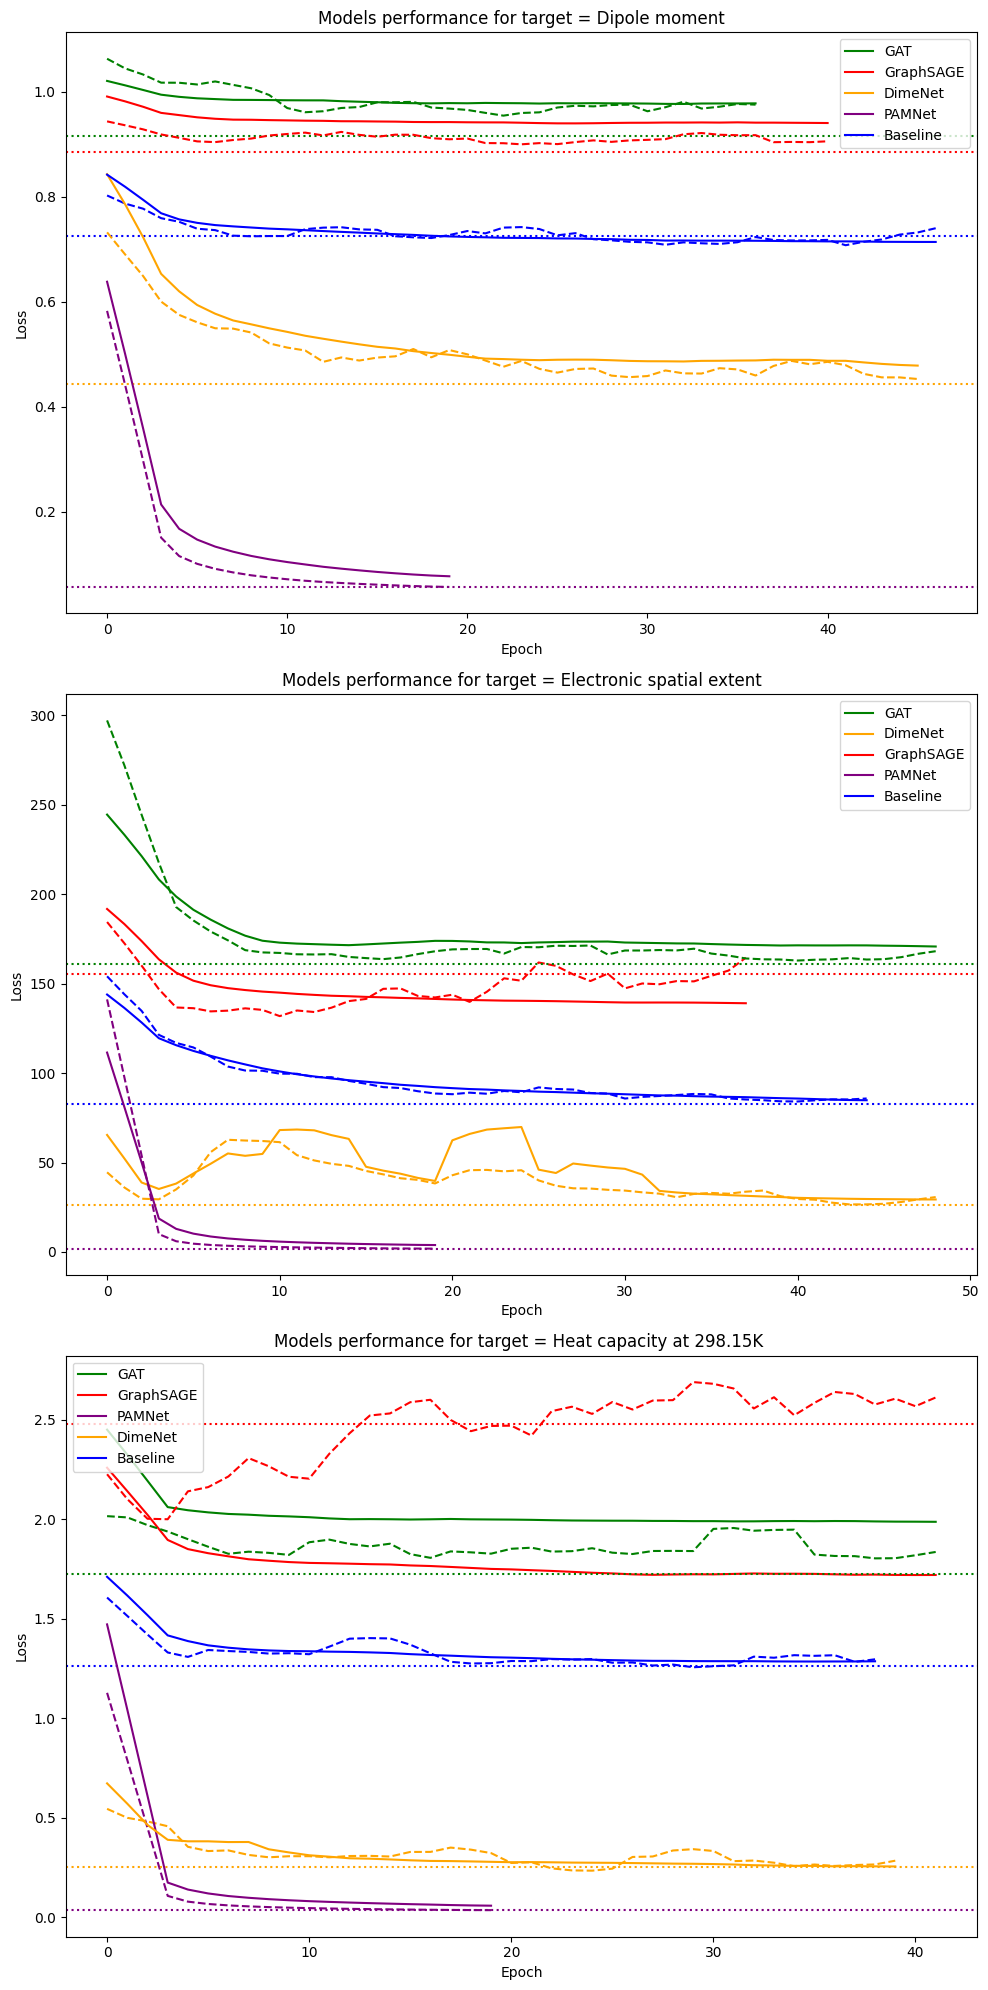

In [45]:
models = ['Baseline', 'GraphSAGE', 'GAT', 'DimeNet', 'PAMNet']

# all npy files in the predictions folder
files = [f for f in os.listdir('./predictions') if f.endswith('.npy') and 'hydrogens_True' in f]
print(len(files), "files found")
# Sort files by target number
files.sort(key=lambda f: int(re.search(r'target_(\d+)', f).group(1)))

# Initialize plot
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

models_color_dict = {'Baseline':'blue', 'GraphSAGE':'red', 'GAT':'green', 'DimeNet':'orange', 'PAMNet':'purple'}
target_mapping = {0:0, 5:1, 11:2}
target_to_name = {0:'Dipole moment', 5:'Electronic spatial extent', 11:'Heat capacity at 298.15K '}
model_mapping = {'Baseline':0, 'GraphSAGE':1, 'GAT':2, 'DimeNet':3, 'PAMNet':4}

for i, file in enumerate(files):

    # Extract information from file name
    model_name = re.search(r'(Baseline|GraphSAGE|GAT|DimeNet|PAMNet)', file)
    if model_name is None:
        continue
    model_name = model_name.group(1)
    target = int(re.search(r'target_(\d+)', file).group(1))
    loss_type = re.search(r'(train|val|test)_loss', file).group(1)

    # Load loss history
    losses = np.load(os.path.join("./predictions", file))

    # Plot loss history
    color = models_color_dict[model_name]
    linestyle = '-' if loss_type == 'train' else '--' if loss_type == 'val' else ':'
    label = f'{model_name}' if loss_type == 'train' else None

    # slightly modify train loss for plot visibility
    if target == 5 and model_name == 'DimeNet' and loss_type == 'train':
        losses[8] = 50
        losses[9] = 50

    if loss_type in ['train', 'val']:
        window_size = 5
        losses = np.pad(losses, (window_size//2, window_size-1-window_size//2), mode='edge')
        losses = smooth_loss(losses, window_size=window_size)
        axs[target_mapping[target]].plot(losses, color=color, linestyle=linestyle, label=label)
    else:
        axs[target_mapping[target]].axhline(y=losses, color=color, linestyle=linestyle, label=label)
    axs[target_mapping[target]].set_title(f'Models performance for target = {target_to_name[target]}')

# Set plot properties
for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Loss')
    ax.legend()

# Display plot
plt.tight_layout()
plt.savefig('figures/models_comparison.png')
plt.show()

## Implicit valence & implicit hydrogens VS explicit hydrogens

18 files found


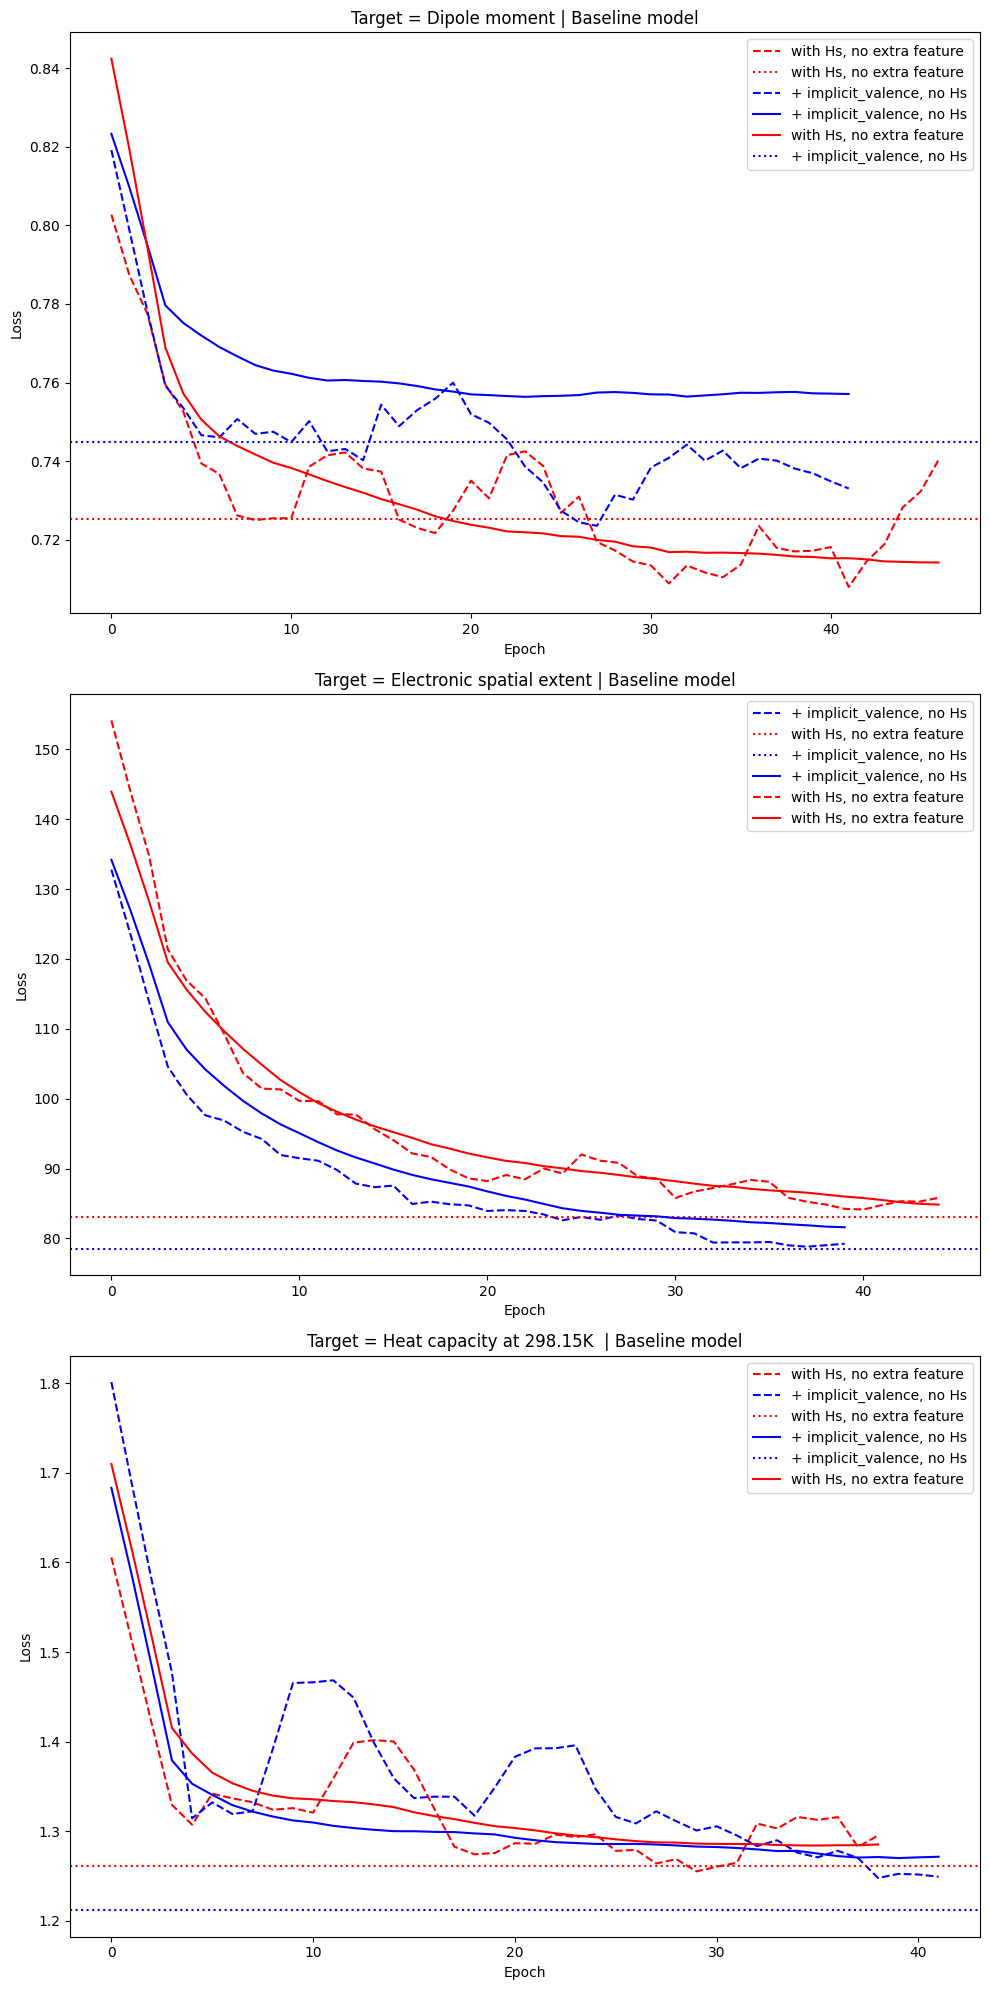

In [46]:
files = [f for f in os.listdir('./predictions') if f.endswith('.npy') and 'Baseline' in f and ('hydrogens_False_extrafeature_implicit_valence' in f or 'hydrogens_True' in f)]
print(len(files), "files found")

files.sort(key=lambda f: int(re.search(r'target_(\d+)', f).group(1)))

fig, axs = plt.subplots(3, 1, figsize=(10, 20))

target_mapping = {0:0, 5:1, 11:2}
target_to_name = {0:'Dipole moment', 5:'Electronic spatial extent', 11:'Heat capacity at 298.15K '}

for i, file in enumerate(files):
    
        # Extract information from file name
        target = int(re.search(r'target_(\d+)', file).group(1))
        loss_type = re.search(r'(train|val|test)_loss', file).group(1)
    
        # Load loss history
        losses = np.load(os.path.join("./predictions", file))
    
        # Plot loss history
        color = 'blue' if 'extrafeature' in file else 'red'
        linestyle = '-' if loss_type == 'train' else '--' if loss_type == 'val' else ':'
        label = f'+ implicit_valence, no Hs' if 'extrafeature' in file else 'with Hs, no extra feature' if 'hydrogens_True' in file else '?'
        if loss_type in ['train', 'val']:
            window_size = 5
            losses = np.pad(losses, (window_size//2, window_size-1-window_size//2), mode='edge')
            losses = smooth_loss(losses, window_size=window_size)
            axs[target_mapping[target]].plot(losses, color=color, linestyle=linestyle, label=label)
        else:
            axs[target_mapping[target]].axhline(y=losses, color=color, linestyle=linestyle, label=label)
        axs[target_mapping[target]].set_title(f'Target = {target_to_name[target]} | Baseline model')

# Set plot properties
for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Loss')
    ax.legend()

# Display plot
plt.tight_layout()
plt.savefig('figures/hydrogens_vs_implicit_valence.png')
plt.show()